In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns            # for better theme
sns.set(style="dark")

In [86]:
data = pd.read_csv("../BTC_99.csv").set_index("date").truncate(after = "2023-06-28 16:00:00")
data.index = pd.to_datetime(data.index)

data['mid'] = data['close'].rolling(window=20).mean()
data['std'] = data['close'].rolling(window=20).std()
data['range'] = data["high"]-data["low"]
data['range_f'] = data["open"]-data["close"]
c = ["g" if u else "r" for u in data['close'] >= data['open']]

data

,Unnamed: 0,open,high,low,close,volume,mid,std,range,range_f
date,,,,,,,,,,
2023-05-27 00:00:00+00:00,0,26705.93,26713.40,26686.31,26689.15,92.77354,NaN,NaN,27.09,16.78
2023-05-27 00:05:00+00:00,1,26689.14,26694.98,26677.23,26692.25,139.78788,NaN,NaN,17.75,-3.11
2023-05-27 00:10:00+00:00,2,26692.25,26692.25,26678.60,26678.86,34.35930,NaN,NaN,13.65,13.39
2023-05-27 00:15:00+00:00,3,26678.87,26680.56,26673.11,26673.11,36.52595,NaN,NaN,7.45,5.76
2023-05-27 00:20:00+00:00,4,26673.12,26675.71,26652.75,26666.38,61.32347,NaN,NaN,22.96,6.74
...,...,...,...,...,...,...,...,...,...,...
2023-06-28 15:35:00+00:00,9403,30396.00,30449.83,30395.99,30432.18,198.05809,30332.8065,87.115074,53.84,-36.18
2023-06-28 15:40:00+00:00,9404,30432.18,30448.38,30401.95,30415.47,149.44511,30344.9225,80.327878,46.43,16.71
2023-06-28 15:45:00+00:00,9405,30415.47,30440.00,30390.37,30392.78,93.24894,30354.3615,73.716415,49.63,22.69


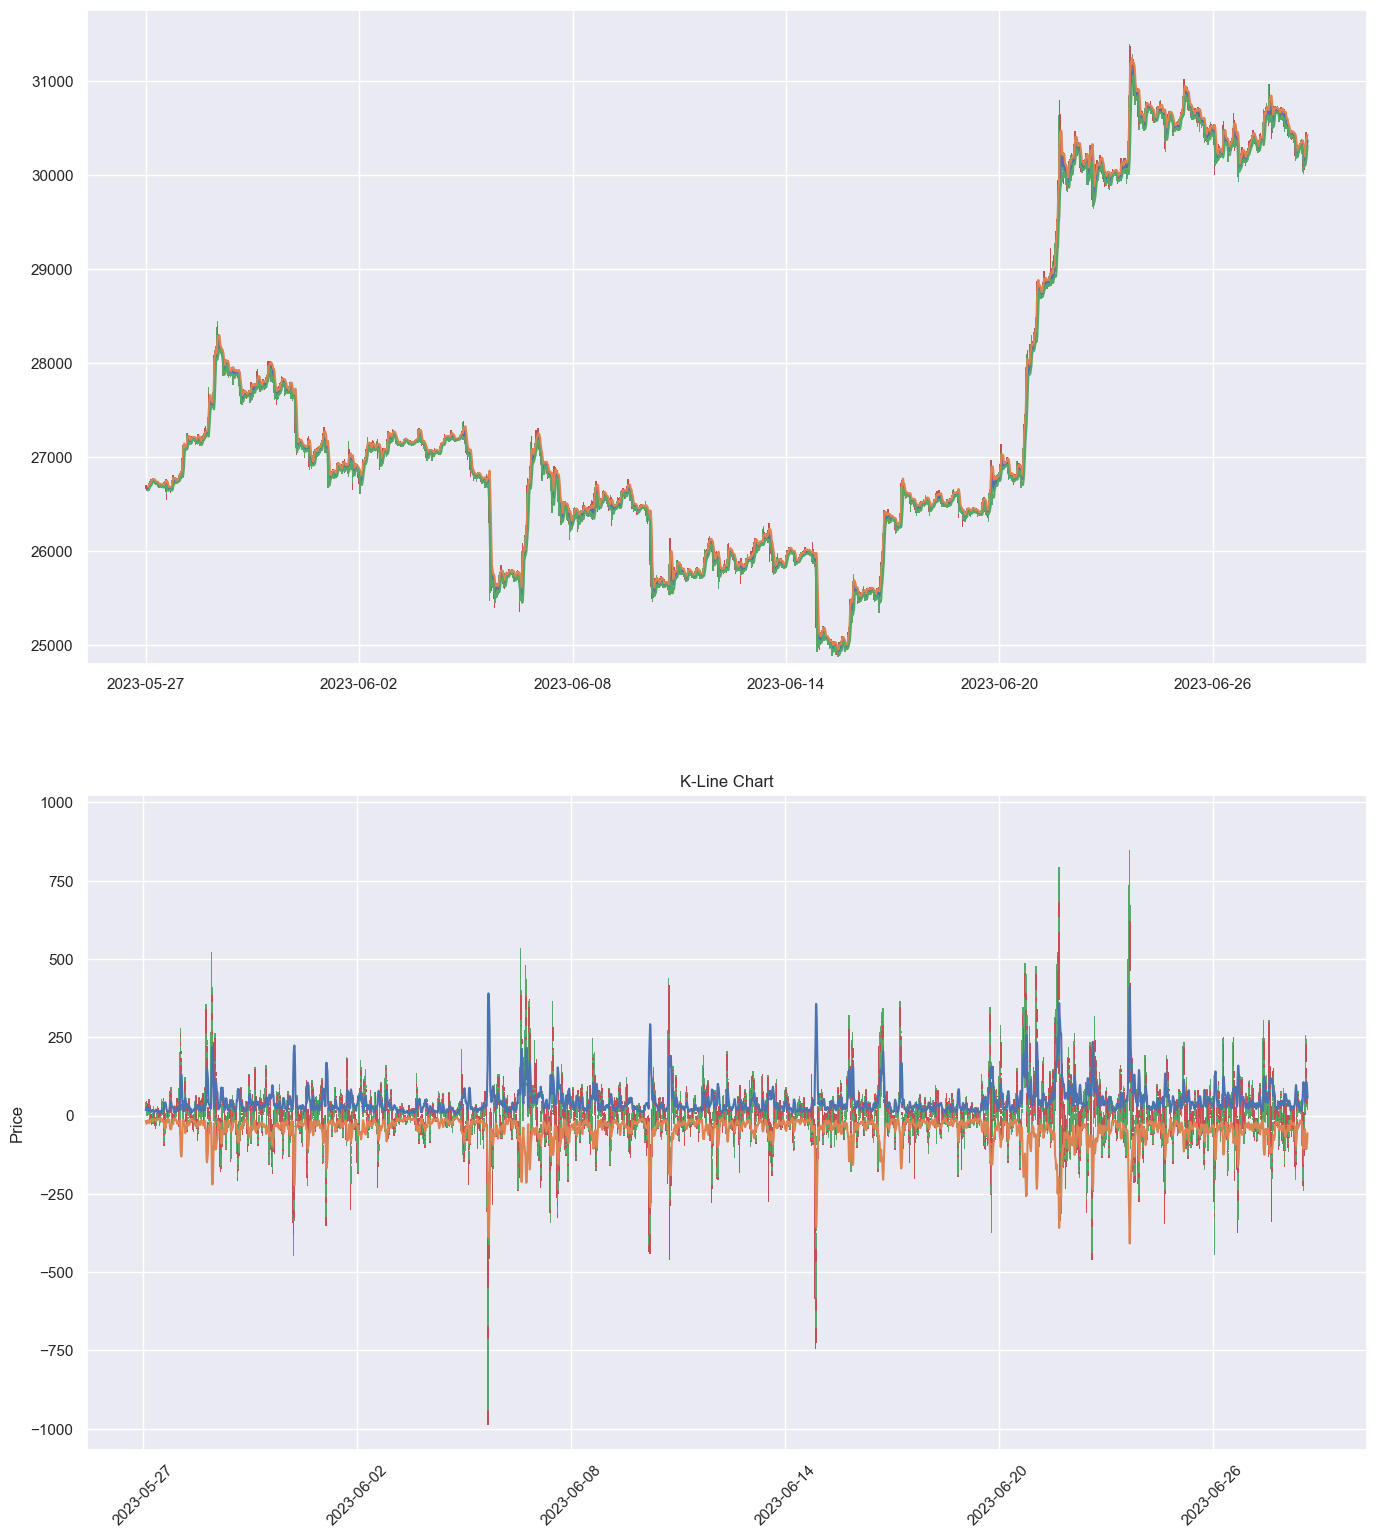

In [110]:
# 创建一个Figure和一个Axes
fig, ax = plt.subplots(2,1)

# 绘制K线图
# 使用candlestick_ohlc函数绘制K线图
ax[0].grid(True)
ax[0].xaxis_date()  # x轴显示日期
ax[1].grid(True)
ax[1].xaxis_date()  # x轴显示日期

# 遍历数据并绘制K线图
ax[0].bar(data.index, data["range"], bottom=data["low"], color=c, width=0.01, linewidth=0)
ax[0].bar(data.index, data["range_f"], bottom=data["close"], color=c, width=0.05, linewidth=0)
    
ax[0].plot(data.index, data["mid"])
ax[0].plot(data.index, data["mid"]+data["std"])
ax[0].plot(data.index, data["mid"]-data["std"])

ax[1].bar(data.index, data["range"], bottom=data["low"]-data["mid"], color=c, width=0.01, linewidth=0)
ax[1].bar(data.index, data["range_f"], bottom=data["close"]-data["mid"], color=c, width=0.05, linewidth=0)

ax[1].plot(data.index,  data["std"])
ax[1].plot(data.index, -data["std"])
    
    
# 设置x轴标签为日期格式
ax[0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
ax[0].xaxis.set_major_locator(plt.MaxNLocator(nbins=6))
ax[1].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
ax[1].xaxis.set_major_locator(plt.MaxNLocator(nbins=6))

# 设置x轴标签旋转45度，使其更好地显示
plt.xticks(rotation=45)

# 设置y轴标签
plt.ylabel('Price')

# 设置图表标题
plt.title('K-Line Chart')

# 显示图表
plt.subplots_adjust(left=0, right=2, bottom = 0, top= 3)
plt.show()

# Model & Train

In [88]:
data.rolling(window=20)

Rolling [window=20,center=False,axis=0,method=single]

In [94]:
train_size = int(len(data)*0.9)
test_size = len(data)-train_size-32

def split_data(stock, window):
    data = stock.to_numpy() 
    data_raw = data[20:, 1:8]
    data_x = np.array([data_raw[i:i+window] for i in range(len(data_raw)-window)]) # left the last element
    data_y = data_raw[window:]
    
    return data_x[:train_size], data_y[:train_size, :5], data_x[train_size:], data_y[train_size:, :5]

lookback = 12
x = split_data(data, lookback)
x_train, y_train, x_test, y_test = split_data(data, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

test_size

x_train.shape =  (8467, 12, 7)
y_train.shape =  (8467, 5)
x_test.shape =  (909, 12, 7)
y_test.shape =  (909, 5)


909

In [95]:




import torch
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, input_window, input_length, hidden_dim):
        super(MLP, self).__init__()
        self.input_dim = input_window*input_length
        
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(self.input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, 5)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        
        return out


In [96]:
x_train = torch.from_numpy(x_train.reshape((train_size,-1))).type(torch.Tensor)
x_test = torch.from_numpy(x_test.reshape((test_size,-1))).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

In [98]:
model = MLP(lookback, 7, 64)
criterion = torch.nn.MSELoss()
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)
num_epochs = 500

import time

hist = np.zeros(num_epochs)
start_time = time.time()
lstm = []

for t in range(num_epochs):
    y_train_pred = model(x_train)
    loss = criterion(y_train_pred, y_train)
    
    if(t%50==0)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
    
training_time = time.time()-start_time
print("Training time: {}".format(training_time))

Training time: 67.7530300617218


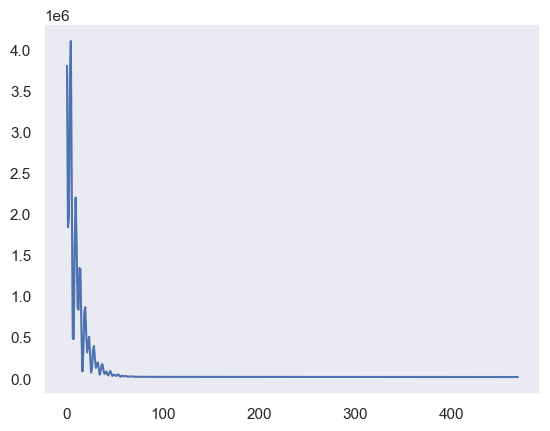

In [100]:
plt.plot(hist[30:])

In [101]:
y_test_pred = model(x_test)
loss = criterion(y_test_pred, y_test)
#print("Epoch ", t, "MSE: ", loss.item())
loss.item()

8377.9599609375

In [102]:
y_test_pred.shape

pred_data = pd.DataFrame(y_test_pred.detach().numpy(), columns=['open','high','low','close','volume'])
pred_data

,open,high,low,close,volume
0,30658.960938,30672.152344,30631.013672,30654.271484,159.071564
1,30663.617188,30676.902344,30635.824219,30658.189453,161.289337
2,30664.089844,30678.355469,30635.810547,30659.281250,162.022247
3,30671.042969,30684.511719,30640.935547,30664.400391,159.387482
4,30672.425781,30685.564453,30644.283203,30667.203125,159.510040
...,...,...,...,...,...
904,30349.714844,30380.660156,30333.935547,30360.369141,184.051544
905,30360.996094,30387.398438,30342.201172,30368.888672,180.931915
906,30361.164062,30384.394531,30341.761719,30366.406250,174.897736
907,30363.488281,30385.041016,30344.304688,30367.664062,173.858185


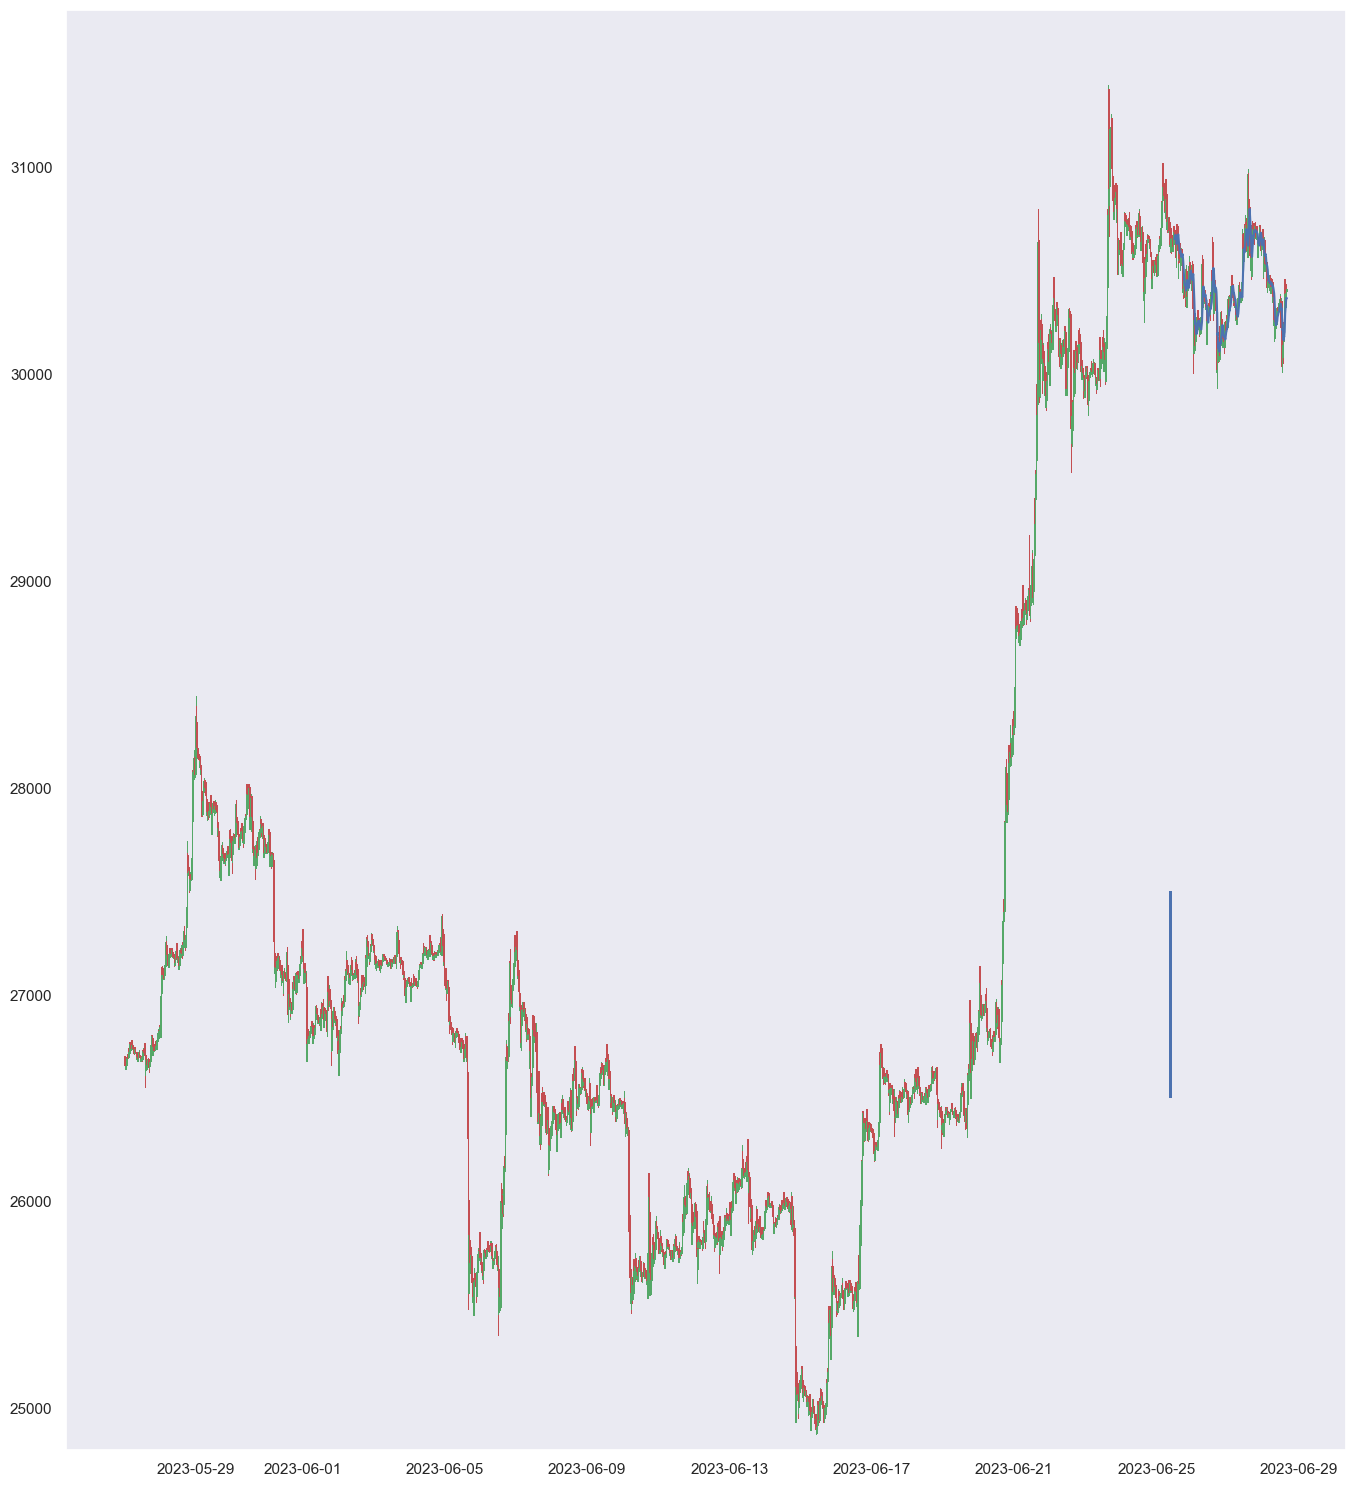

In [106]:
plt.bar(data.index, data["range"], bottom=data["low"], color=c, width=0.01, linewidth=0)
plt.bar(data.index, data["range_f"], bottom=data["close"], color=c, width=0.05, linewidth=0)
plt.bar(data.index[train_size], 1000, bottom=26500, color="b", width=0.1, linewidth=0)
plt.plot(data.index[32+train_size:], pred_data["close"])
plt.subplots_adjust(left=0, right=2, bottom = 0, top= 3)

# Simulate

In [107]:
data_s = data[20:300]

step=600
for i in range(step):
    x = data_s[-12:].to_numpy()[:,1:8]
    x = torch.from_numpy(x.reshape(-1)).type(torch.Tensor)
    y = model(x).detach().numpy()
    
    new_row = pd.DataFrame([y], index=[data_s.index[-1]+pd.DateOffset(minutes=10)], columns=['open','high','low','close','volume'])
    data_s = pd.concat([data_s, new_row])

    data_s["mid"][len(data_s)-1]=data_s["close"][-12:].mean()
    data_s["std"][len(data_s)-1]=data_s["close"][-12:].std()
    
print(data_s.index)

DatetimeIndex(['2023-05-27 01:40:00+00:00', '2023-05-27 01:45:00+00:00',
               '2023-05-27 01:50:00+00:00', '2023-05-27 01:55:00+00:00',
               '2023-05-27 02:00:00+00:00', '2023-05-27 02:05:00+00:00',
               '2023-05-27 02:10:00+00:00', '2023-05-27 02:15:00+00:00',
               '2023-05-27 02:20:00+00:00', '2023-05-27 02:25:00+00:00',
               ...
               '2023-05-30 01:25:00+00:00', '2023-05-30 01:35:00+00:00',
               '2023-05-30 01:45:00+00:00', '2023-05-30 01:55:00+00:00',
               '2023-05-30 02:05:00+00:00', '2023-05-30 02:15:00+00:00',
               '2023-05-30 02:25:00+00:00', '2023-05-30 02:35:00+00:00',
               '2023-05-30 02:45:00+00:00', '2023-05-30 02:55:00+00:00'],
              dtype='datetime64[ns, UTC]', length=580, freq=None)


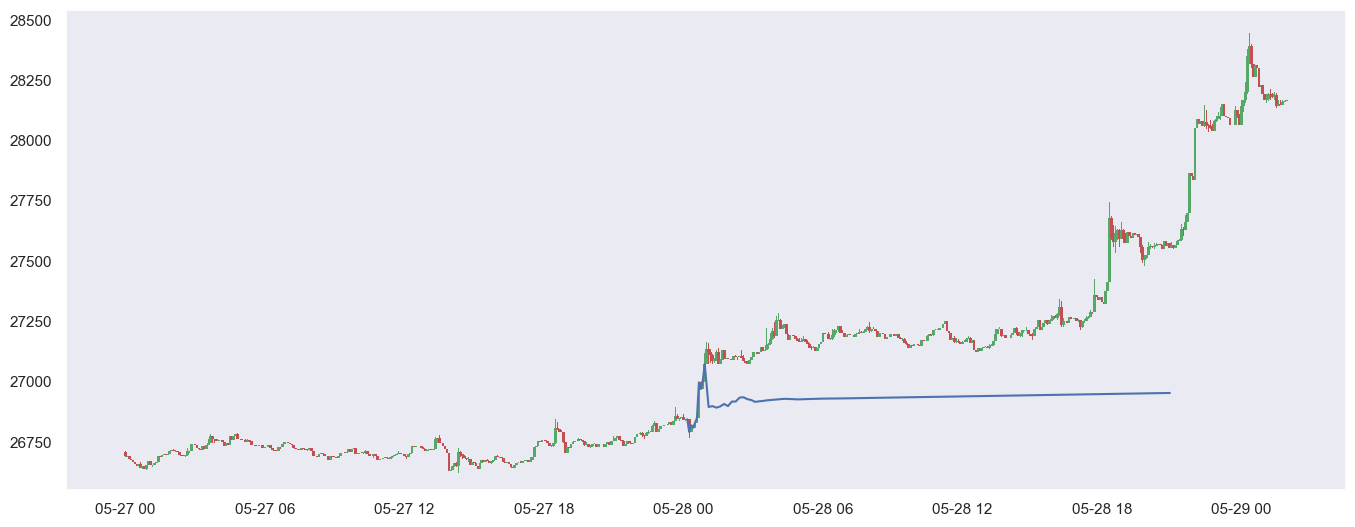

In [116]:
plt.bar(data.index[:600], data["range"][:600], bottom=data["low"][:600], color=c[:600], width=0.001, linewidth=0)
plt.bar(data.index[:600], data["range_f"][:600], bottom=data["close"][:600], color=c[:600], width=0.005, linewidth=0)

plt.plot(data_s.index[280:400], data_s["close"][270:400])

plt.subplots_adjust(left=0, right=2, bottom = 0, top= 1)

In [23]:
help(pd.Series)

Help on class Series in module pandas.core.series:

class Series(pandas.core.base.IndexOpsMixin, pandas.core.generic.NDFrame)
 |  Series(data=None, index=None, dtype: 'Dtype | None' = None, name=None, copy: 'bool' = False, fastpath: 'bool' = False)
 |  
 |  One-dimensional ndarray with axis labels (including time series).
 |  
 |  Labels need not be unique but must be a hashable type. The object
 |  supports both integer- and label-based indexing and provides a host of
 |  methods for performing operations involving the index. Statistical
 |  methods from ndarray have been overridden to automatically exclude
 |  missing data (currently represented as NaN).
 |  
 |  Operations between Series (+, -, /, *, **) align values based on their
 |  associated index values-- they need not be the same length. The result
 |  index will be the sorted union of the two indexes.
 |  
 |  Parameters
 |  ----------
 |  data : array-like, Iterable, dict, or scalar value
 |      Contains data stored in Ser